In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use("dstyle")
_ = plt.figure()
plt.style.use("dstyle")

<Figure size 432x288 with 0 Axes>

In [3]:
MPC_CGS     = 3.0857e24
KM_CGS      = 1.e5
GYRS_CGS    = 3.1536e16

H0 = 67.66

H0_cgs = H0 * (KM_CGS / MPC_CGS)

## Concordance

Cosmological parameters:

- $H_0 = 67.66$ km/s/Mpc
- $\Omega_{\textrm{m}} = 0.3$
- $\Omega_{\Lambda} = 0.7$

In [4]:
table_concordance_fname = "table_concordance_time.txt"

table_concordance = np.loadtxt(table_concordance_fname, skiprows=1, delimiter = ',')

z_arr = table_concordance[:,0]
l_z_arr = table_concordance[:,1]
a_arr = table_concordance[:,2]

time_look_arr_concordance = table_concordance[:,3]
time_age_arr = table_concordance[:,4]

hubble_arr = table_concordance[:,5]
density_arr = table_concordance[:,6]

In [5]:
calculated_age_s = time_age_arr / H0_cgs
age_Gyr_concordance = calculated_age_s / GYRS_CGS

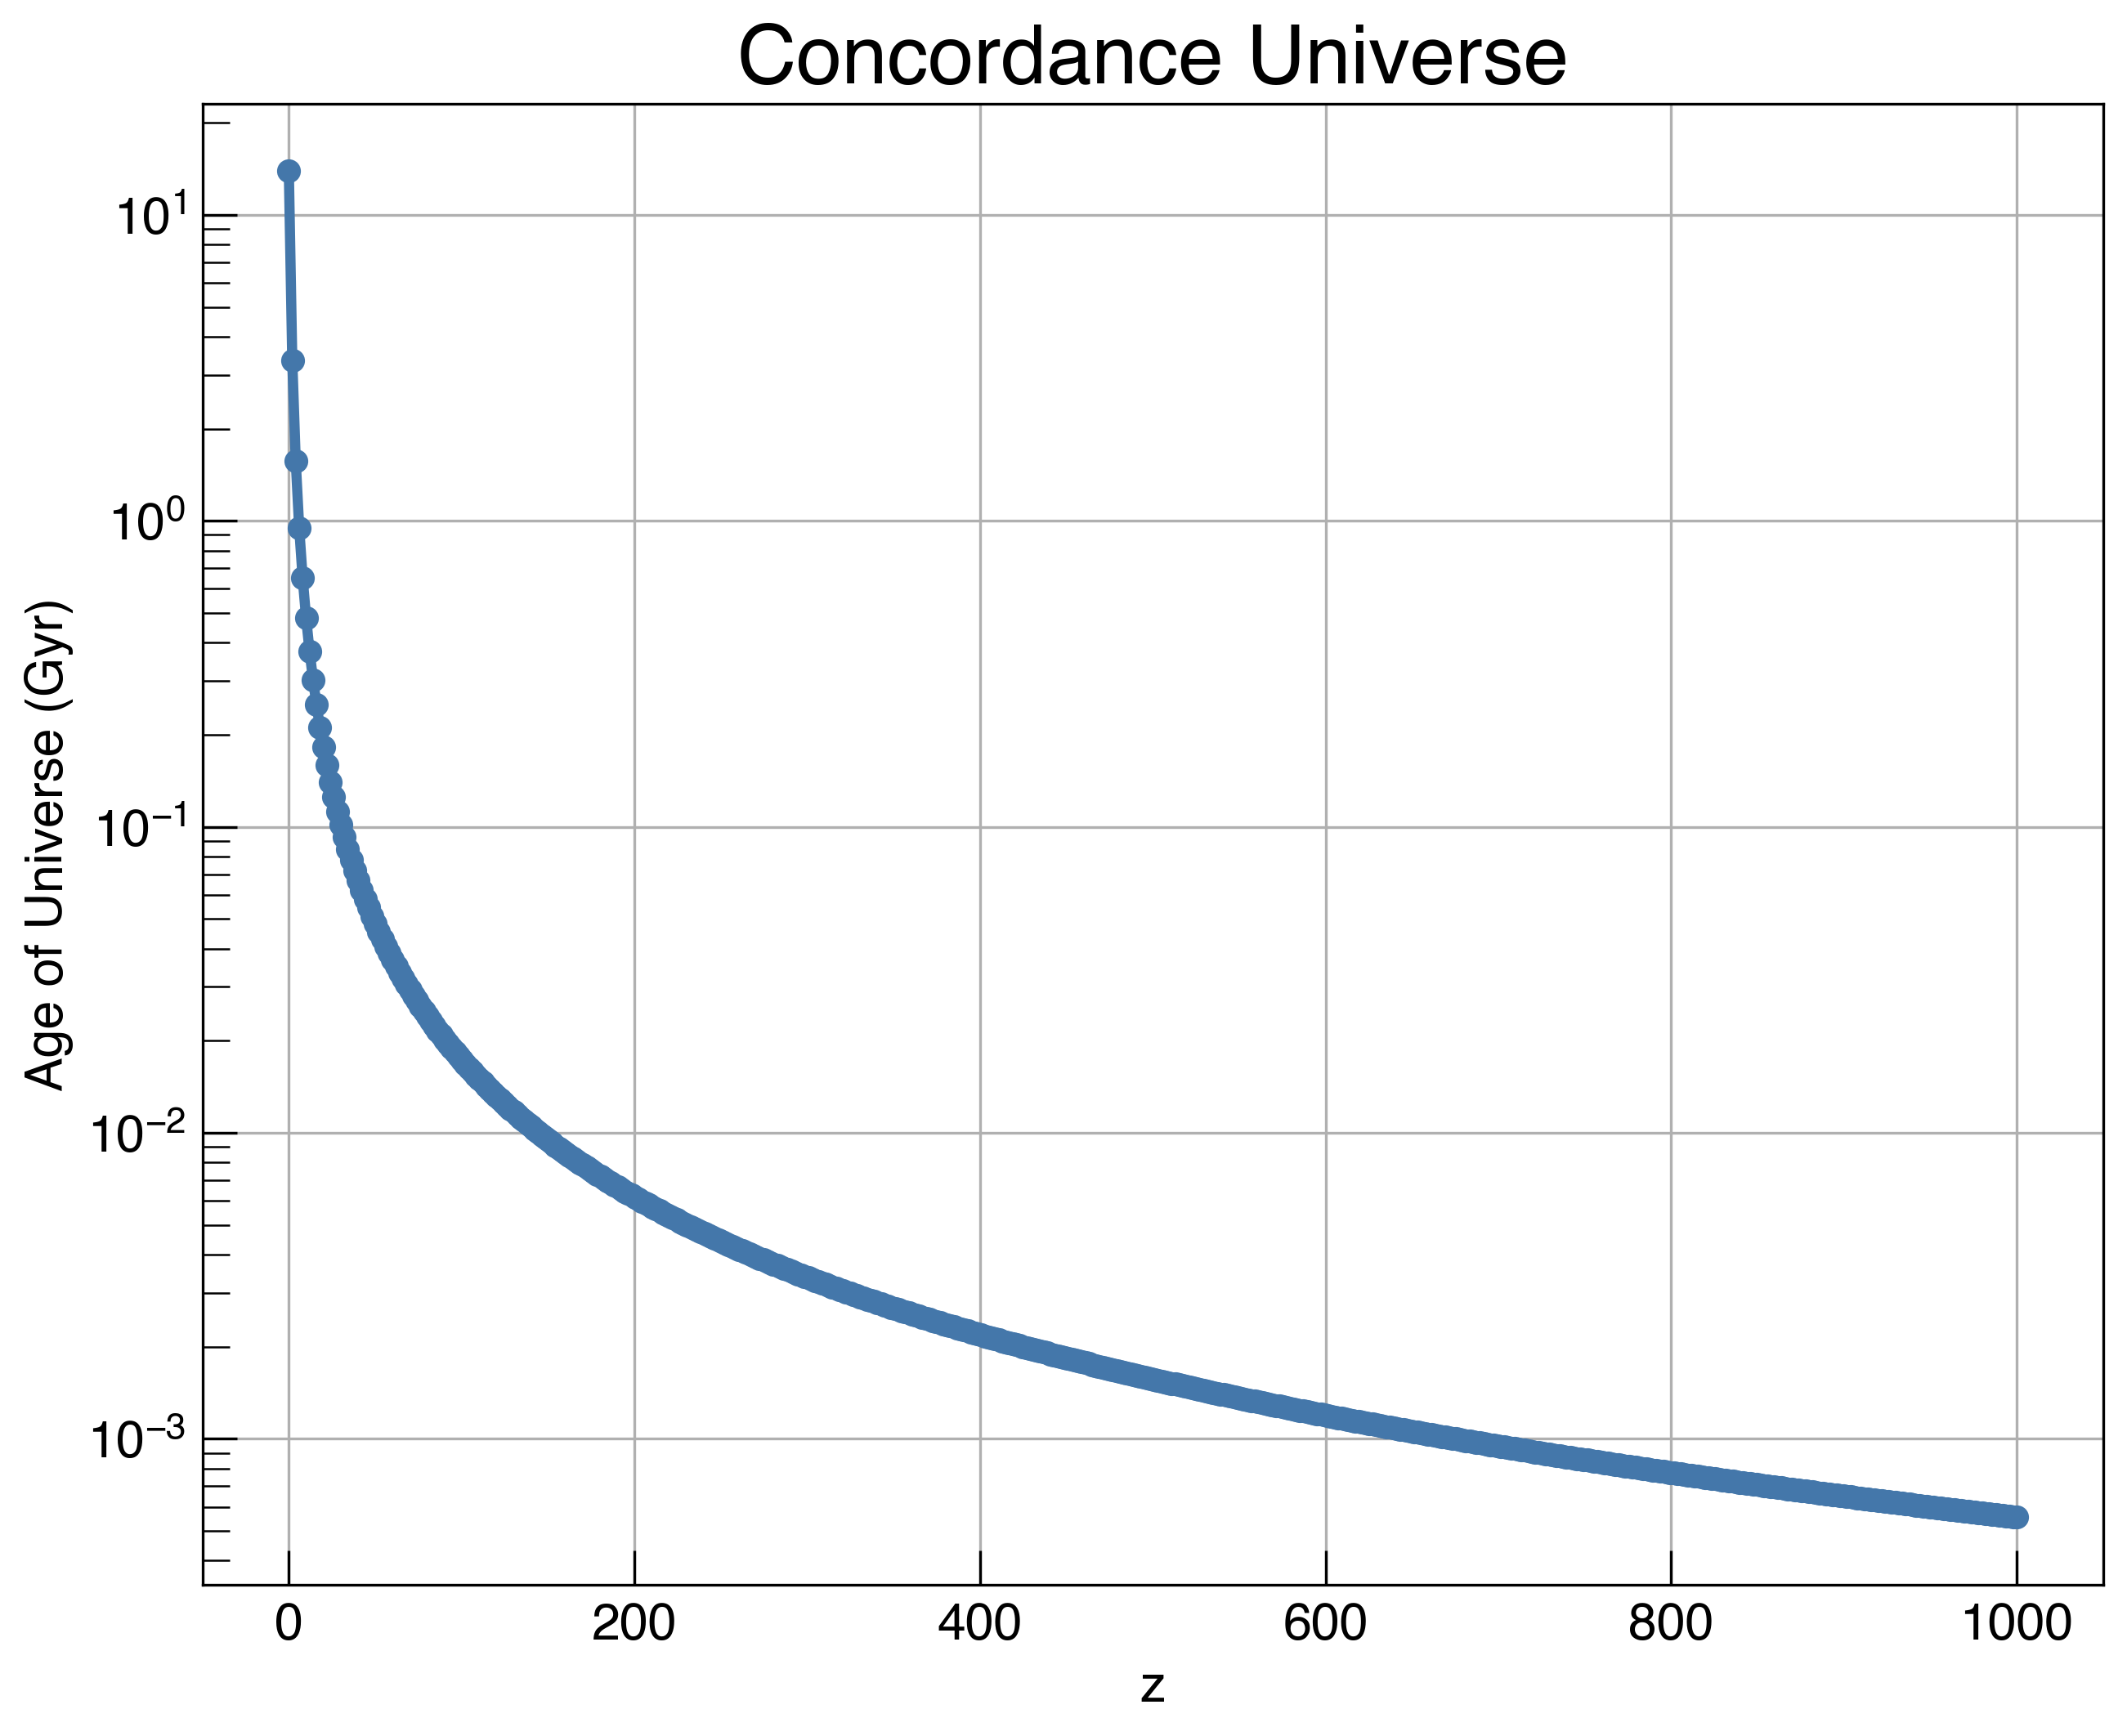

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(z_arr, age_Gyr_concordance, marker='o')

ax.set_xlabel("z")
ax.set_ylabel("Age of Universe (Gyr)")

ax.set_yscale('log')

ax.set_title("Concordance Universe")

ax.grid()

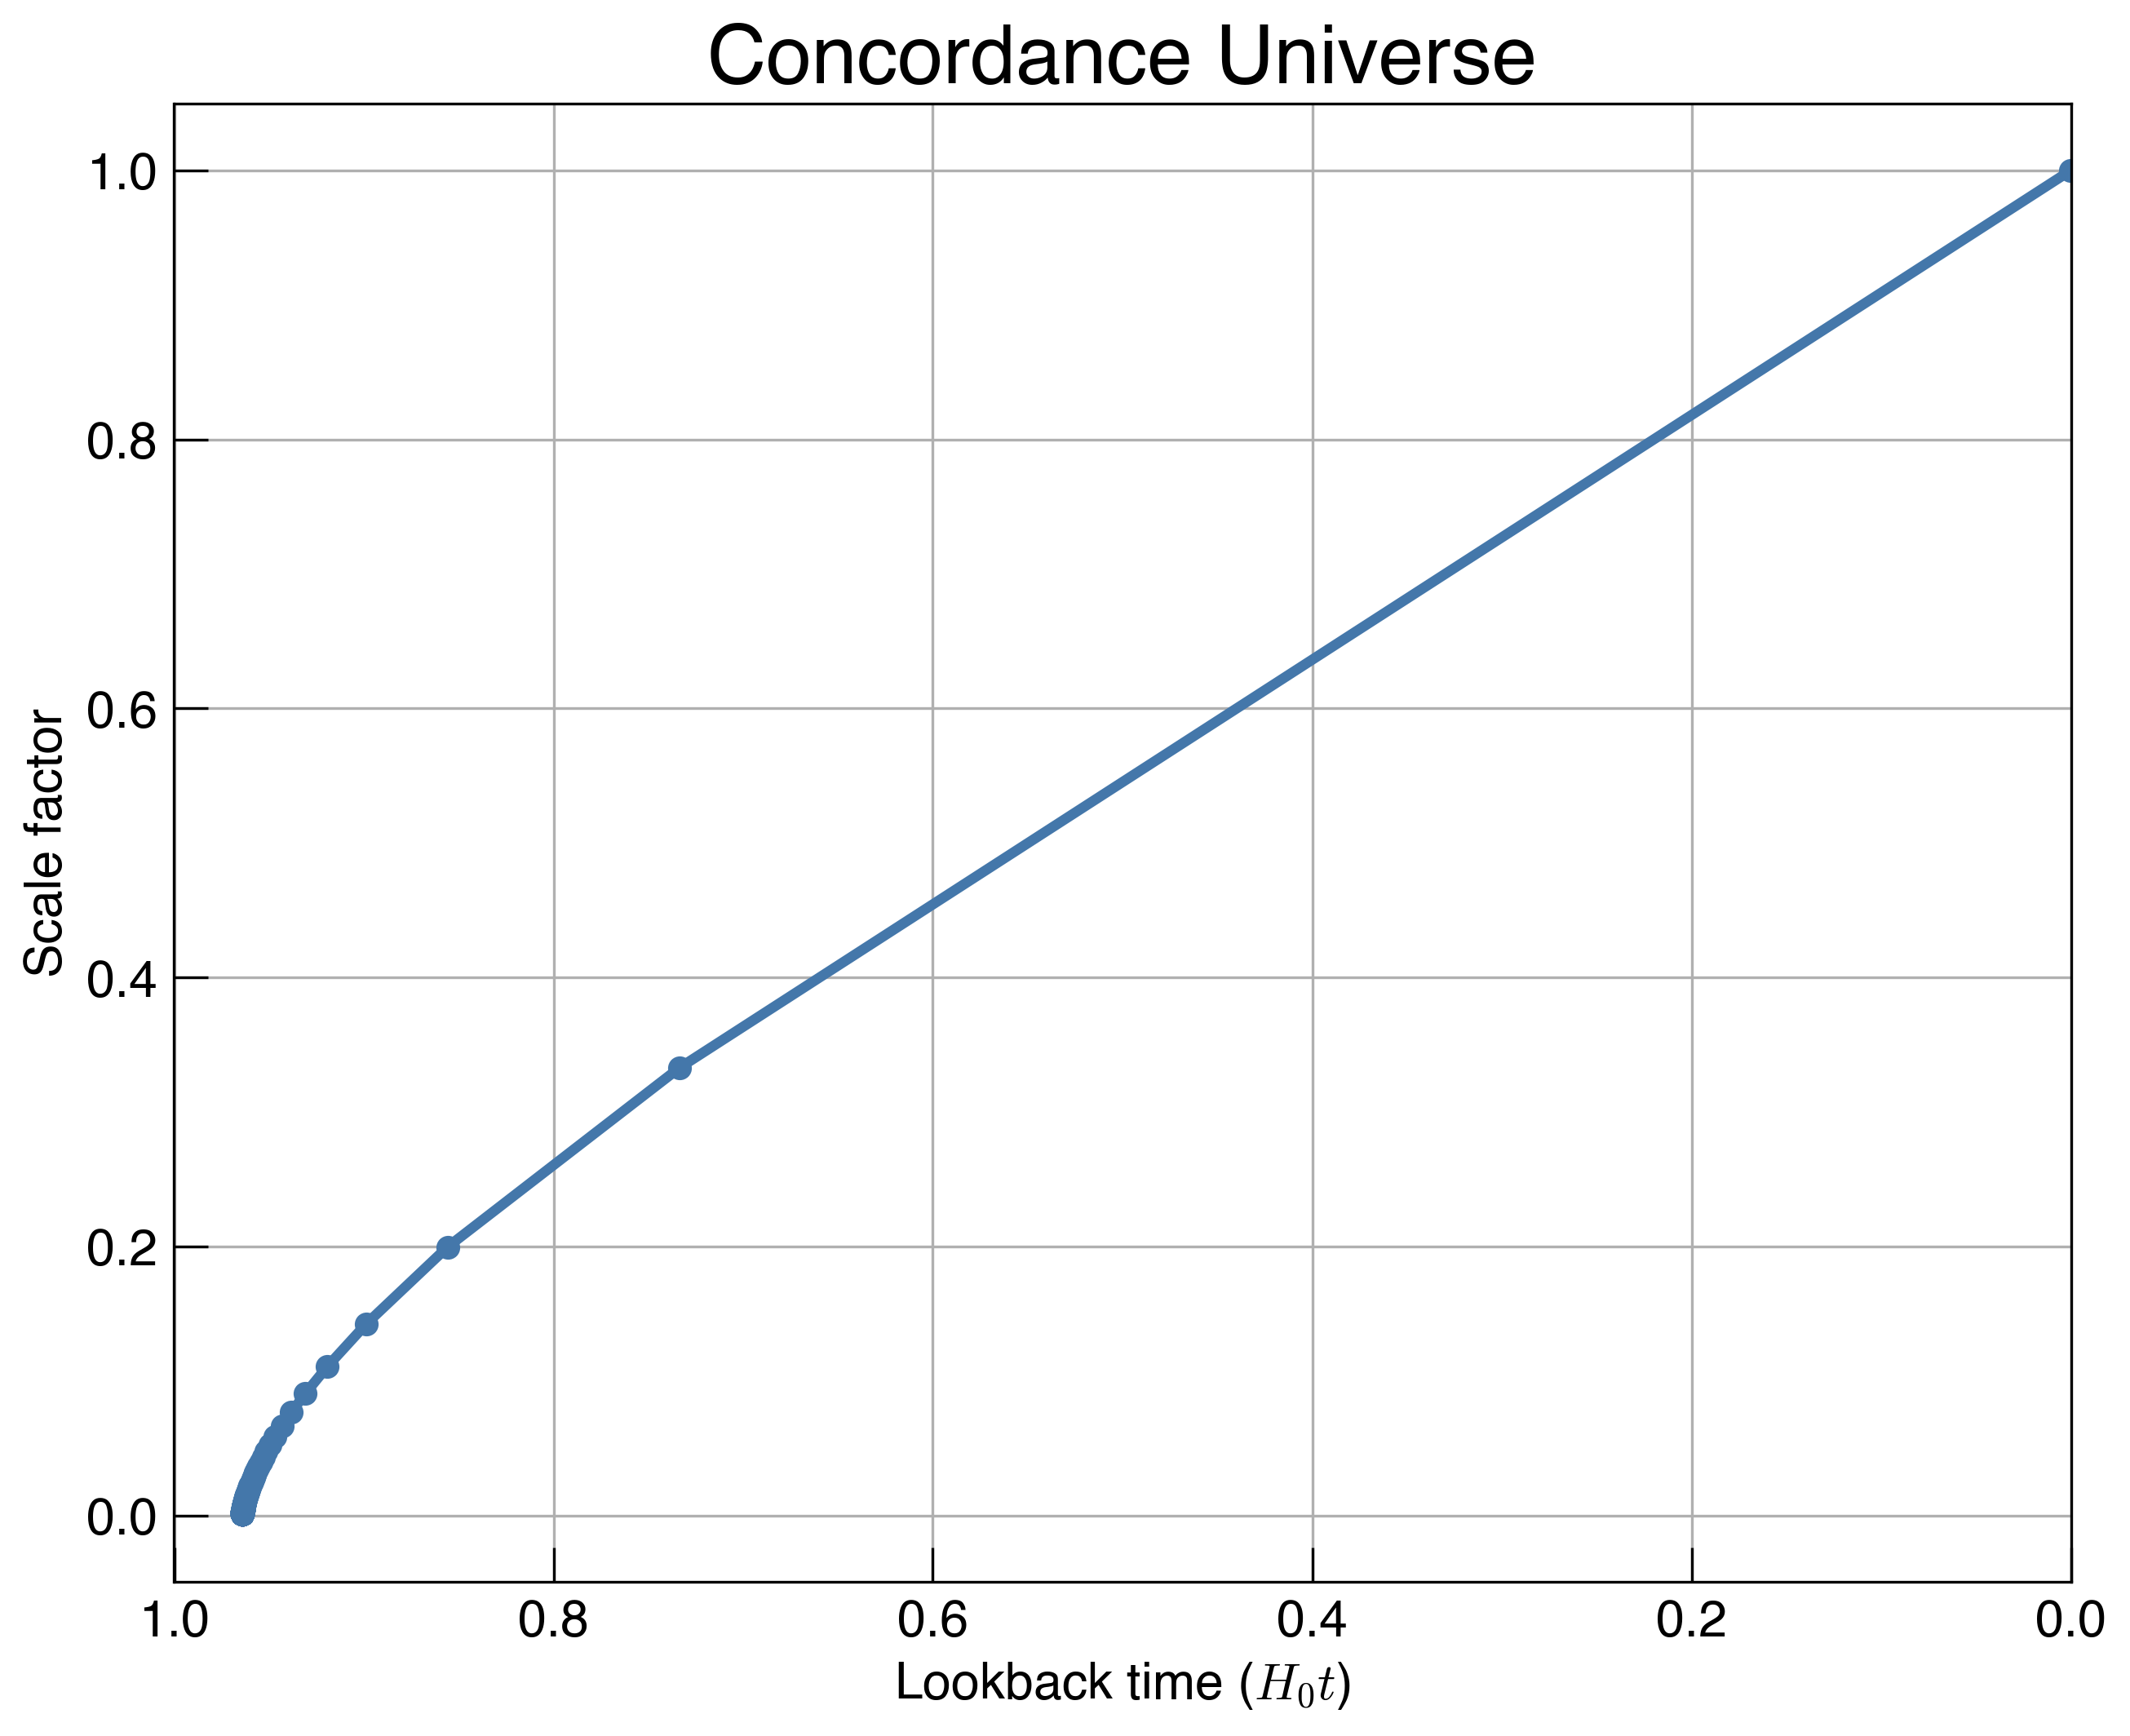

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(time_look_arr_concordance, a_arr, marker='o')

ax.set_xlabel(r"Lookback time ($H_0 t$)")
ax.set_ylabel("Scale factor")

ax.set_xlim(1.0,0.)

ax.set_title("Concordance Universe")

ax.grid()

## Slight Change

Cosmological parameters:

- $H_0 = 67.66$ km/s/Mpc
- $\Omega_{\textrm{m}} = 0.3$
- $\Omega_{\Lambda} = 0.7$
- $w_0 = -1.0$
- $w_a = -0.5$

where $ w(a) = w_0 + w_a (1-a) $

In [8]:
table_lambda_fname = "table_wa_time.txt"

table_lambda = np.loadtxt(table_lambda_fname, skiprows=1, delimiter = ',')

z_arr = table_lambda[:,0]
l_z_arr = table_lambda[:,1]
a_arr = table_lambda[:,2]

time_look_arr_lambda = table_lambda[:,3]
time_age_arr = table_lambda[:,4]

hubble_arr = table_lambda[:,5]
density_arr = table_lambda[:,6]

In [9]:
calculated_age_s = time_age_arr / H0_cgs
age_Gyr_lambda = calculated_age_s / GYRS_CGS

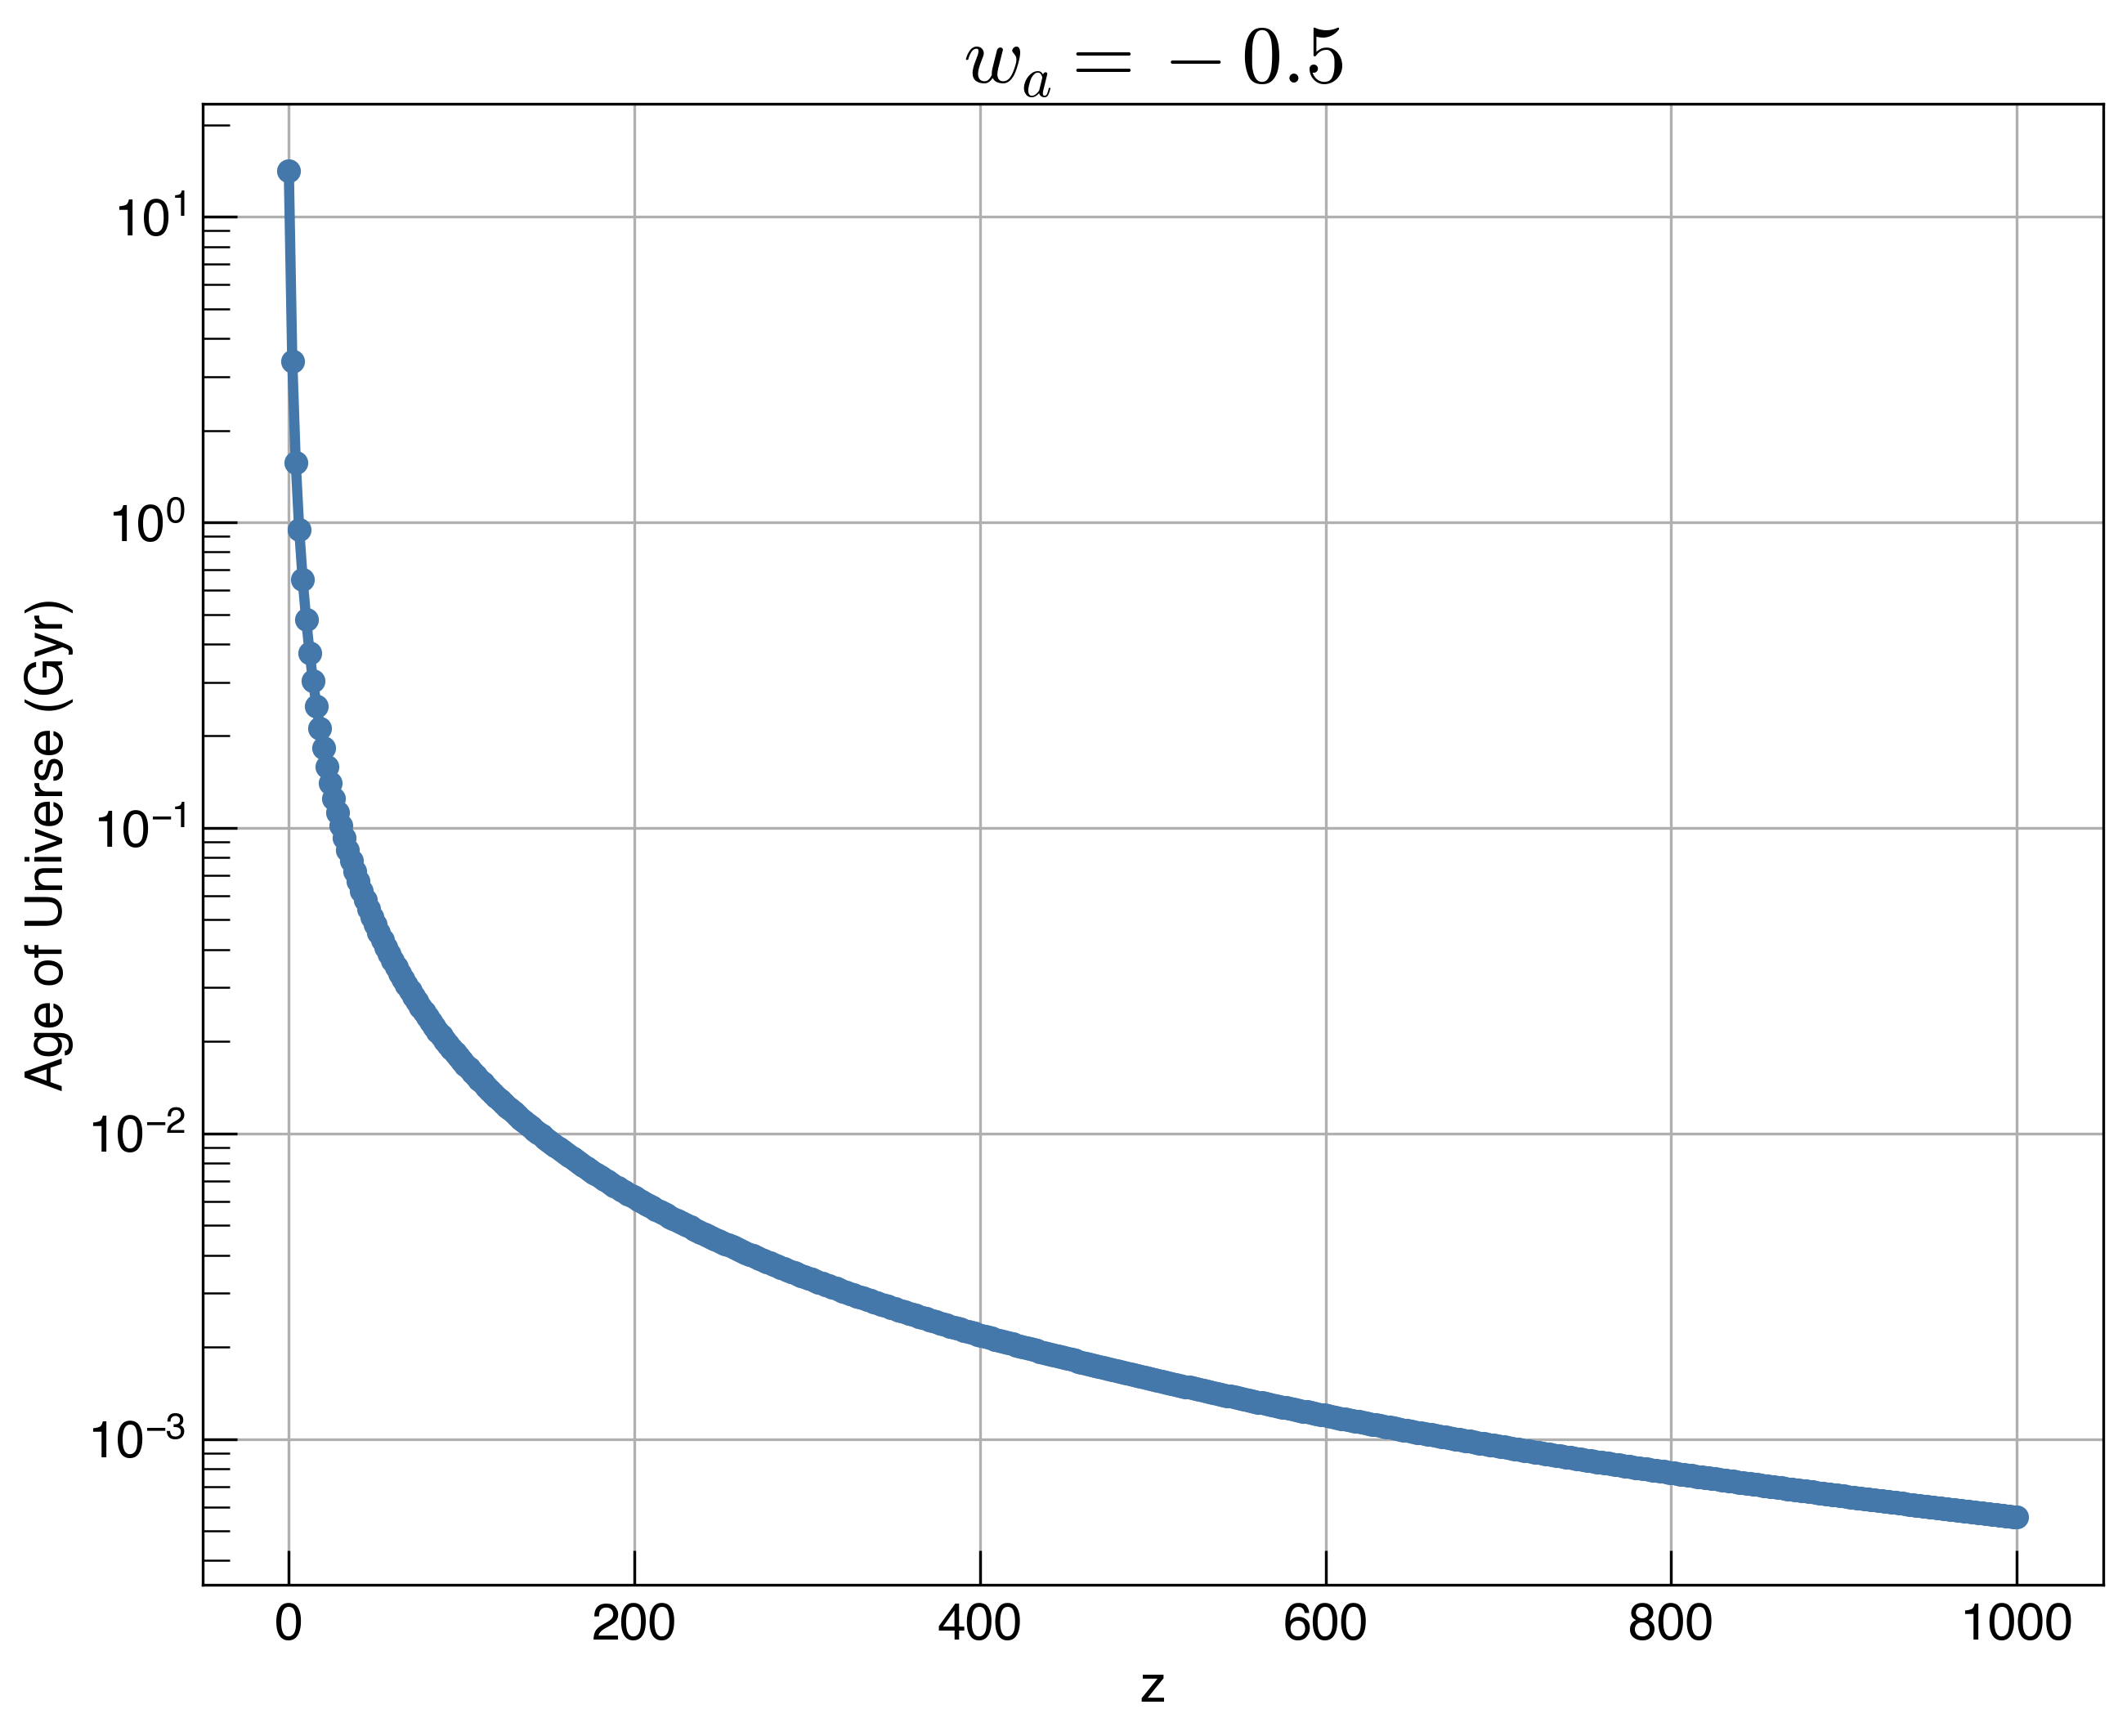

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(z_arr, age_Gyr_lambda, marker='o')

ax.set_xlabel("z")
ax.set_ylabel("Age of Universe (Gyr)")

ax.set_yscale('log')

ax.set_title(r"$w_a = -0.5$")

ax.grid()

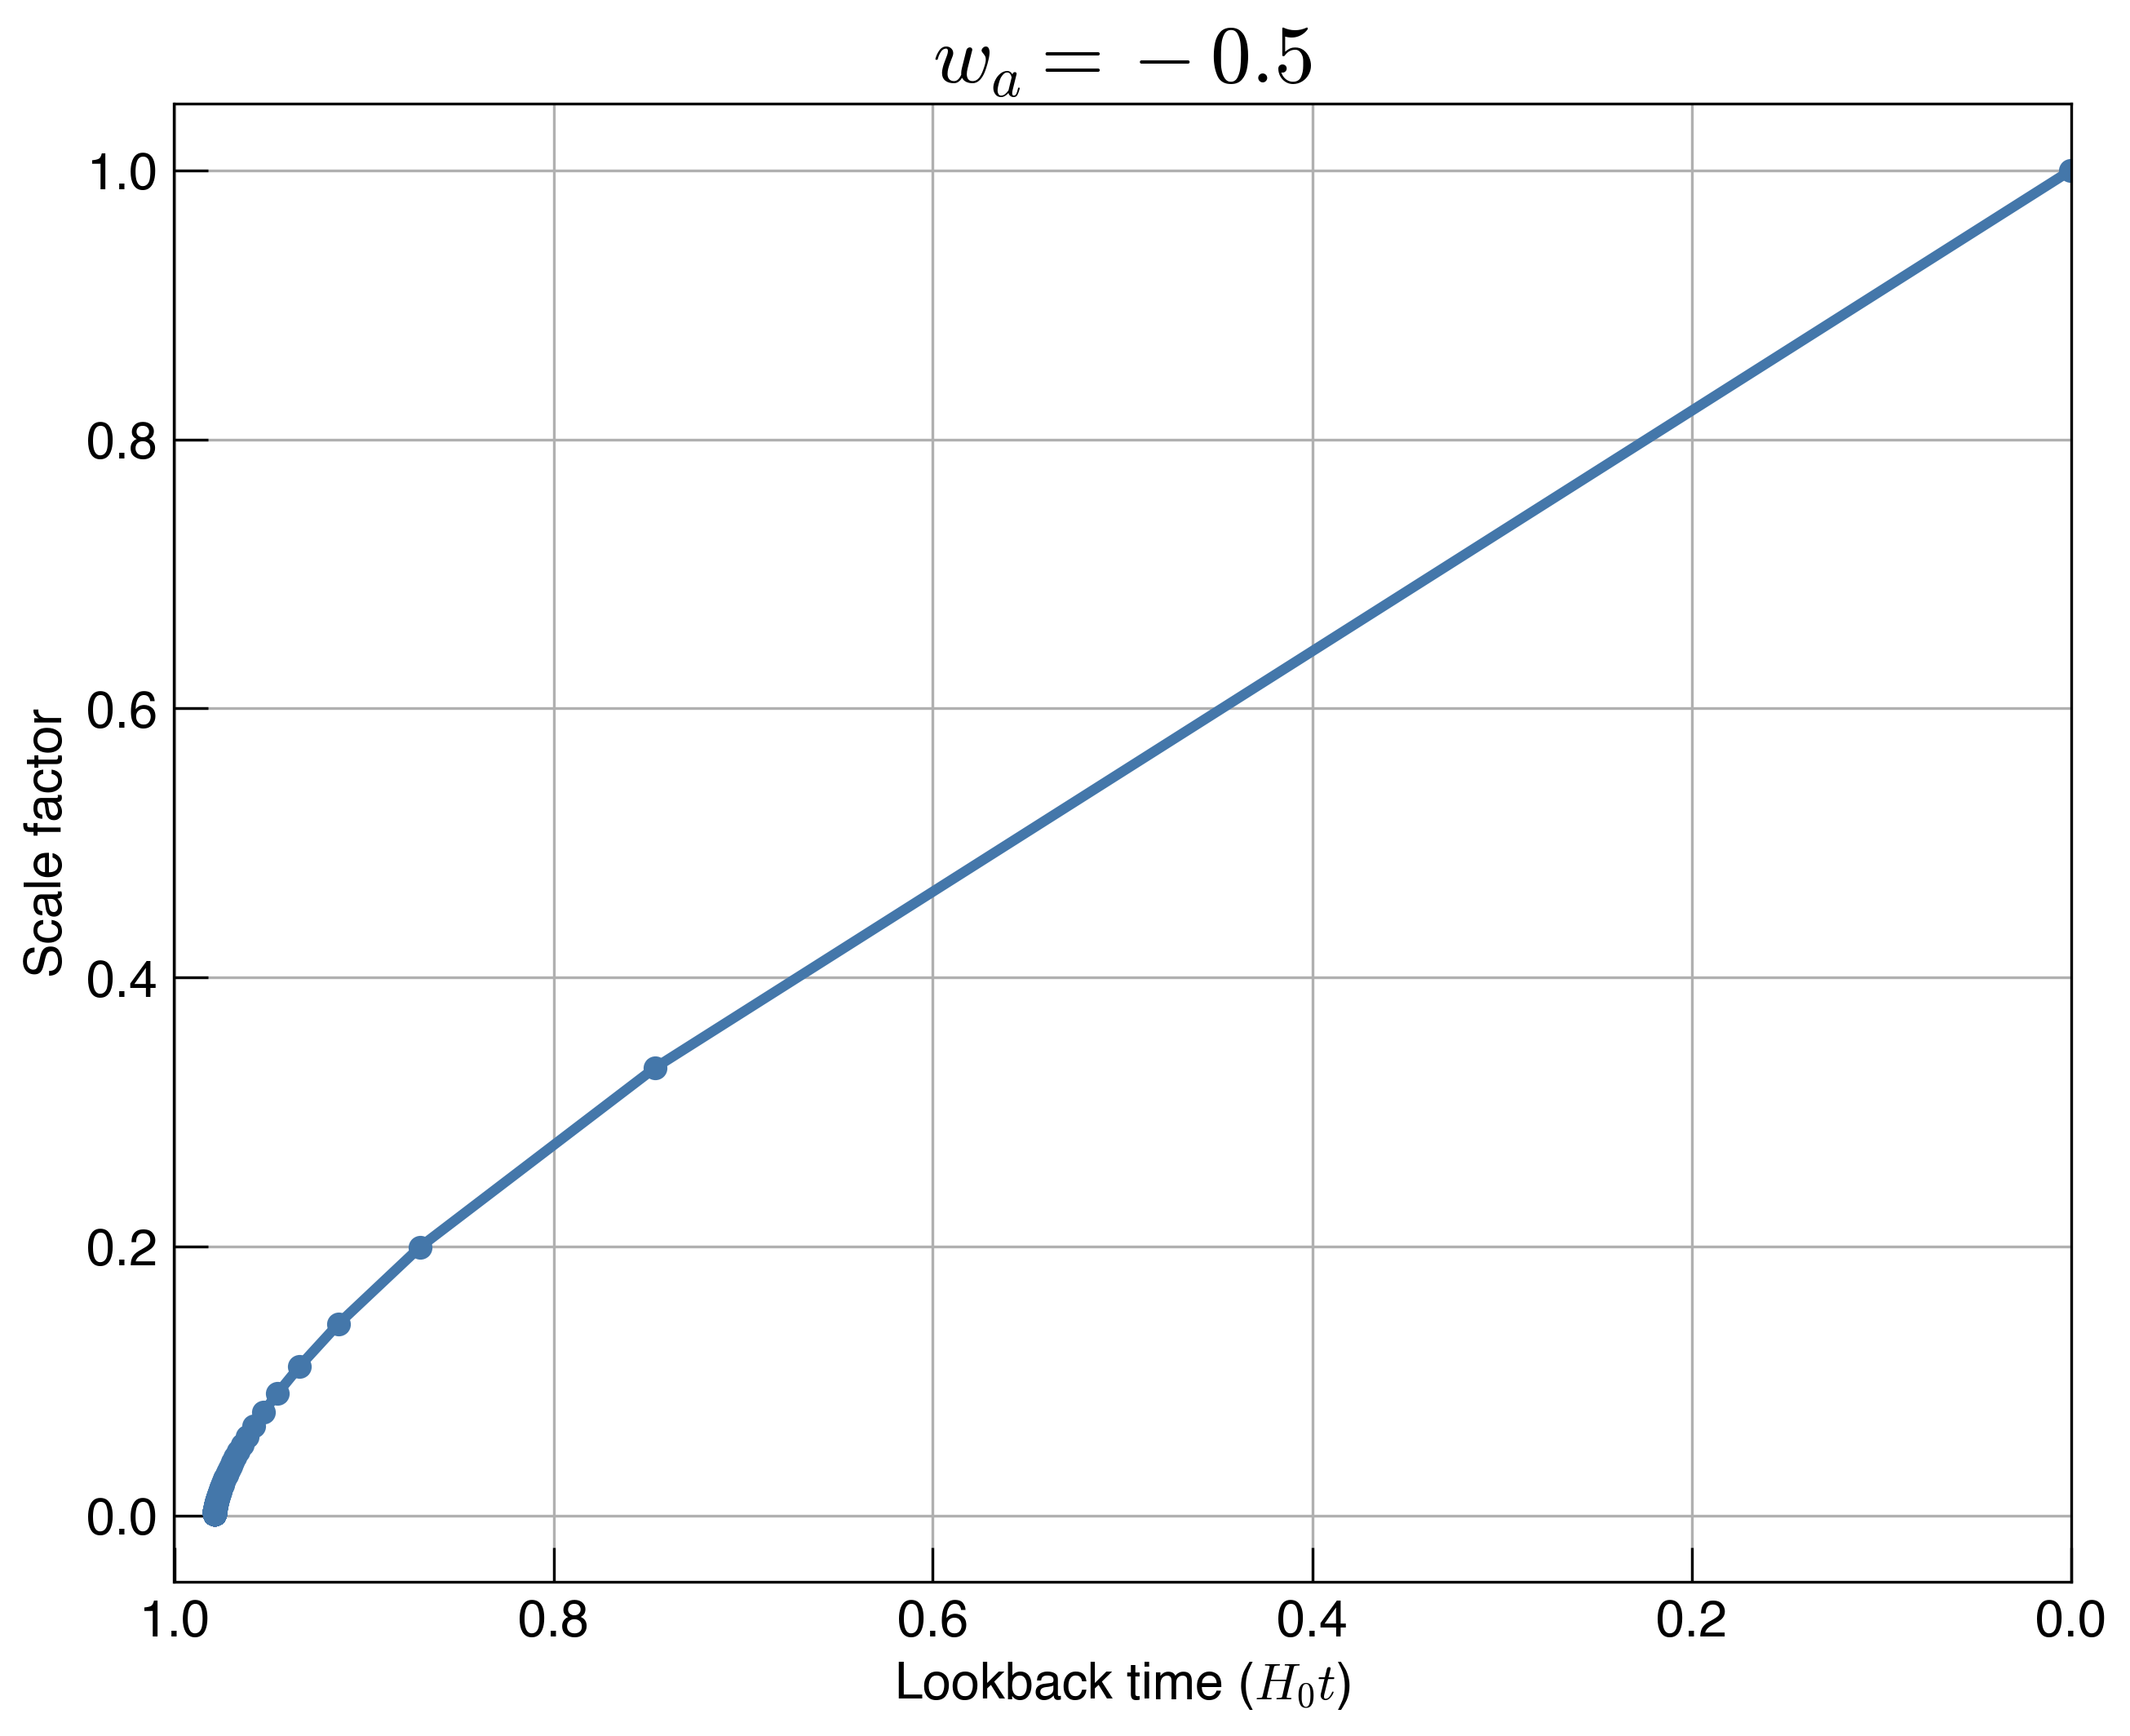

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(time_look_arr_lambda, a_arr, marker='o')

ax.set_xlabel(r"Lookback time ($H_0 t$)")
ax.set_ylabel("Scale factor")

ax.set_xlim(1.0,0.)

ax.set_title(r"$w_a = -0.5$")

ax.grid()

## Overplotting both

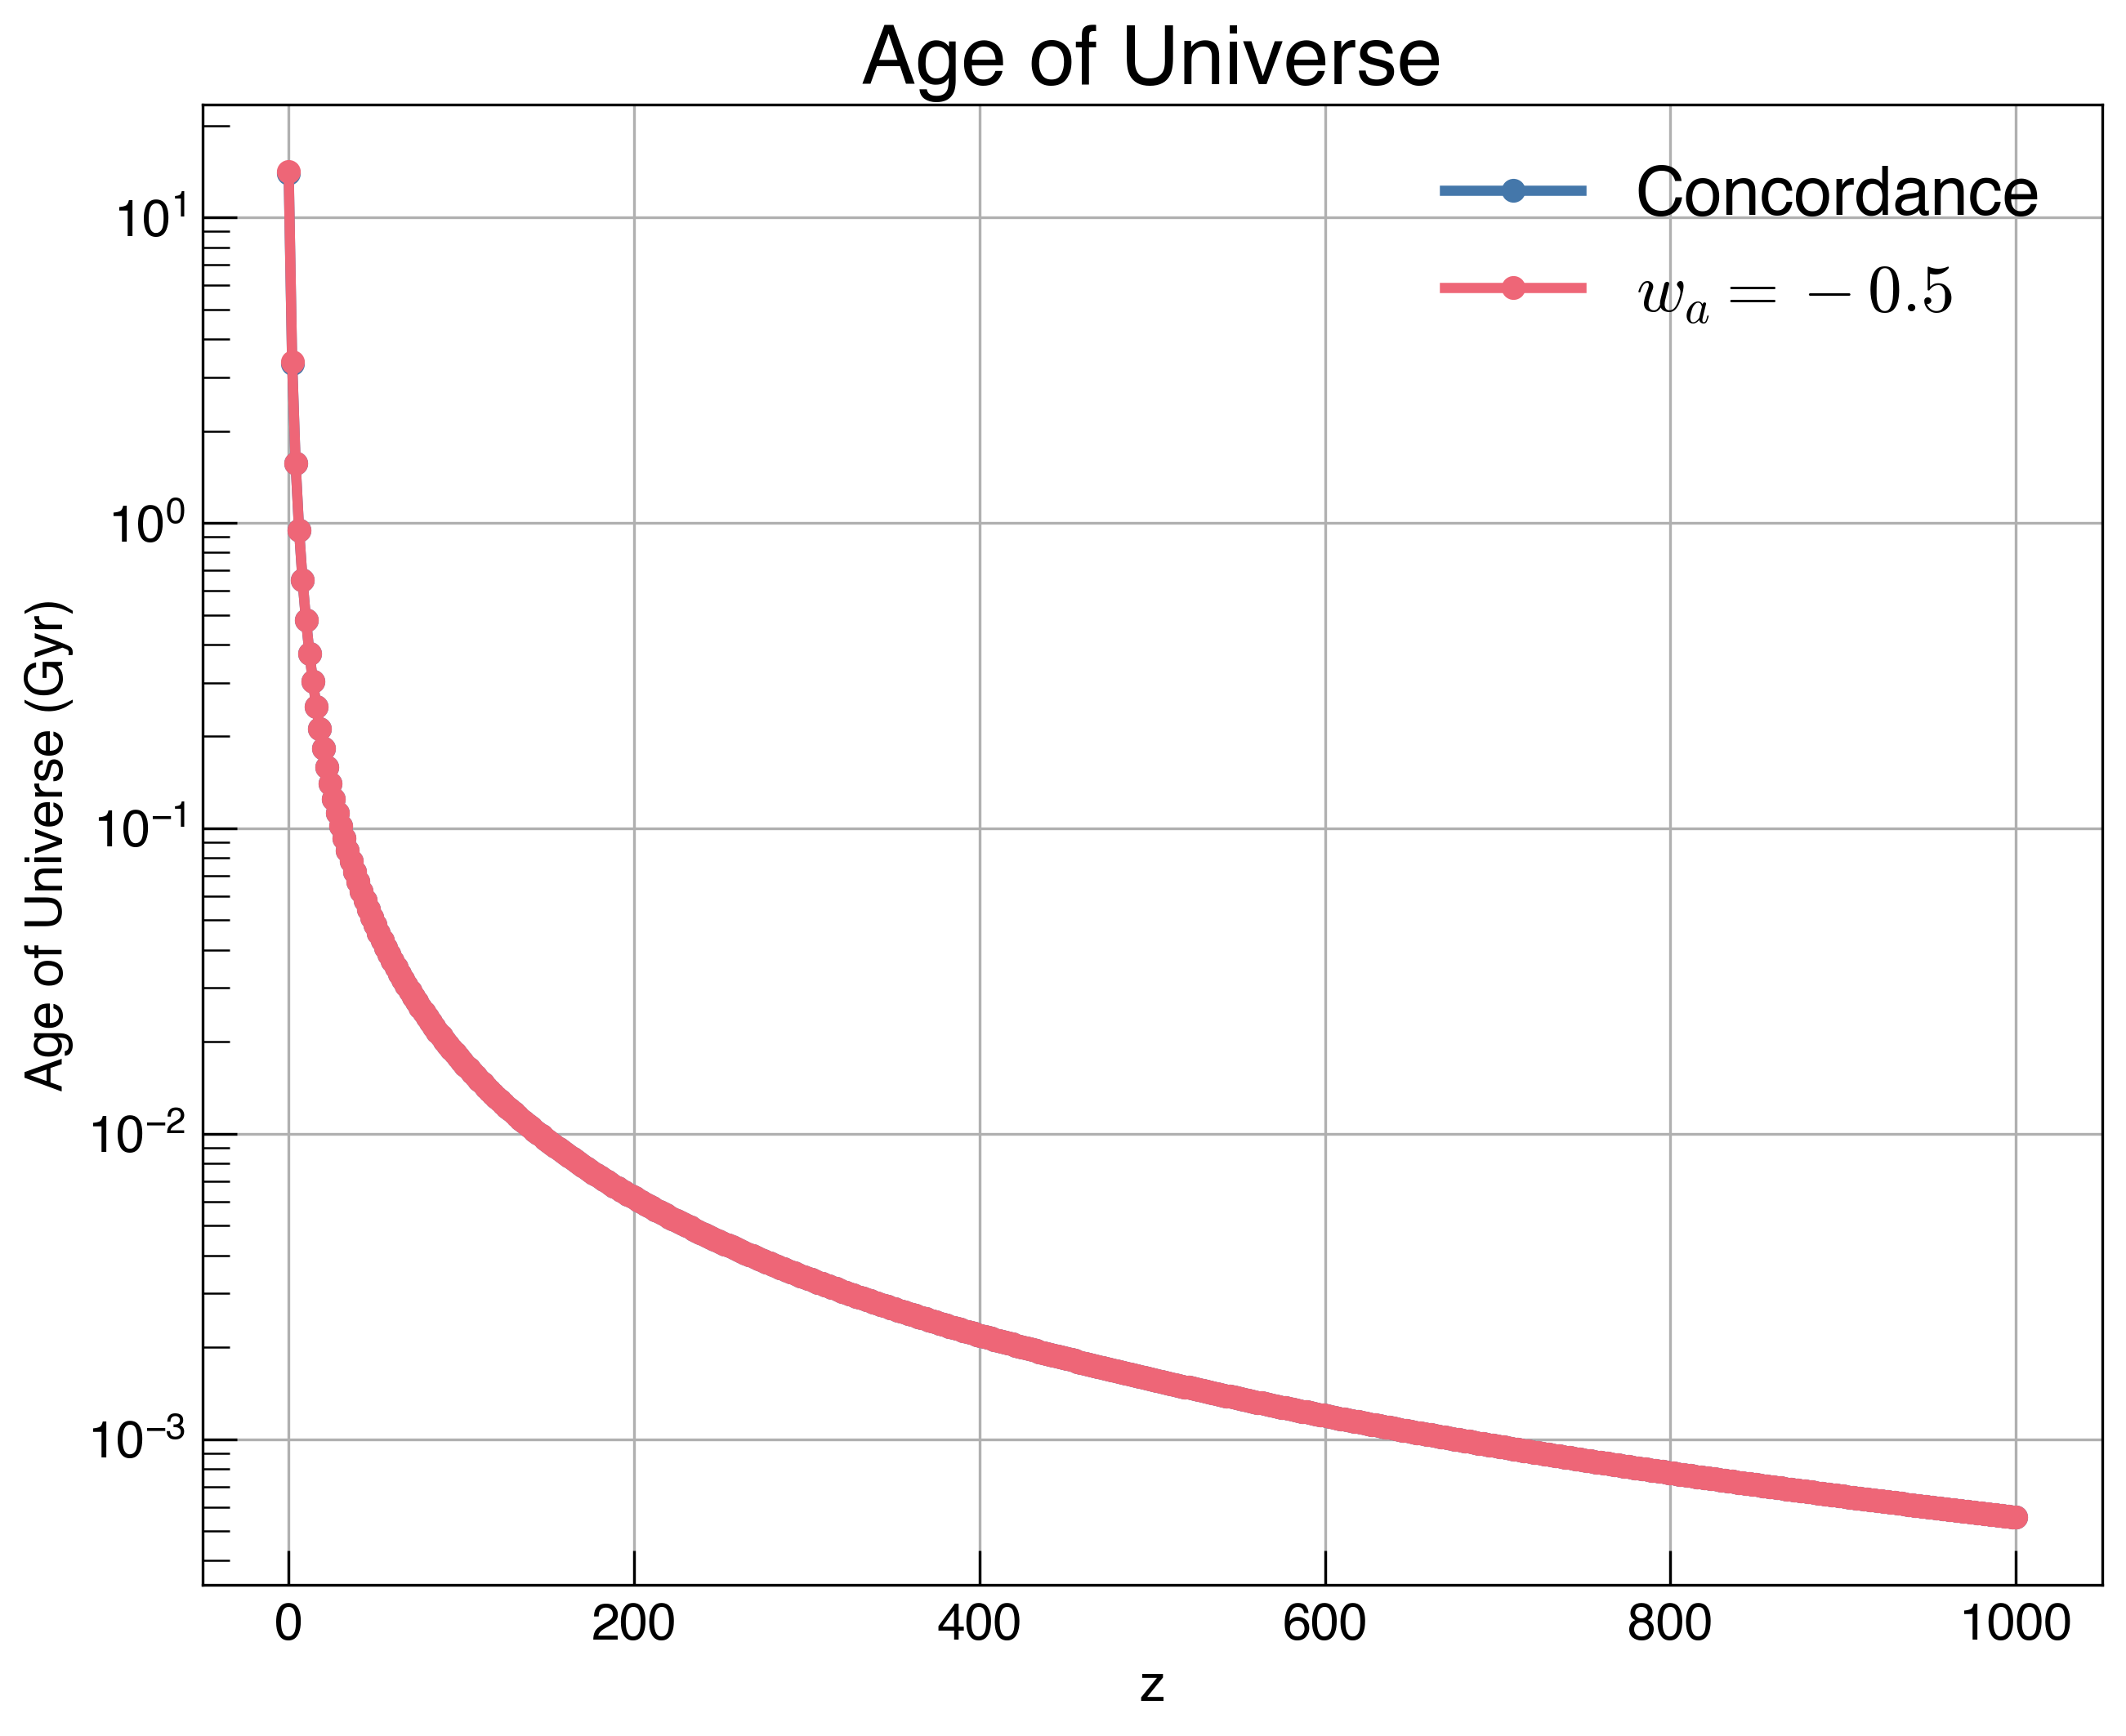

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(z_arr, age_Gyr_concordance, marker='o', label='Concordance')
ax.plot(z_arr, age_Gyr_lambda, marker='o', label=r'$w_a = -0.5$')

ax.set_xlabel("z")
ax.set_ylabel("Age of Universe (Gyr)")

ax.set_yscale('log')

ax.set_title("Age of Universe")

ax.legend()

ax.grid()

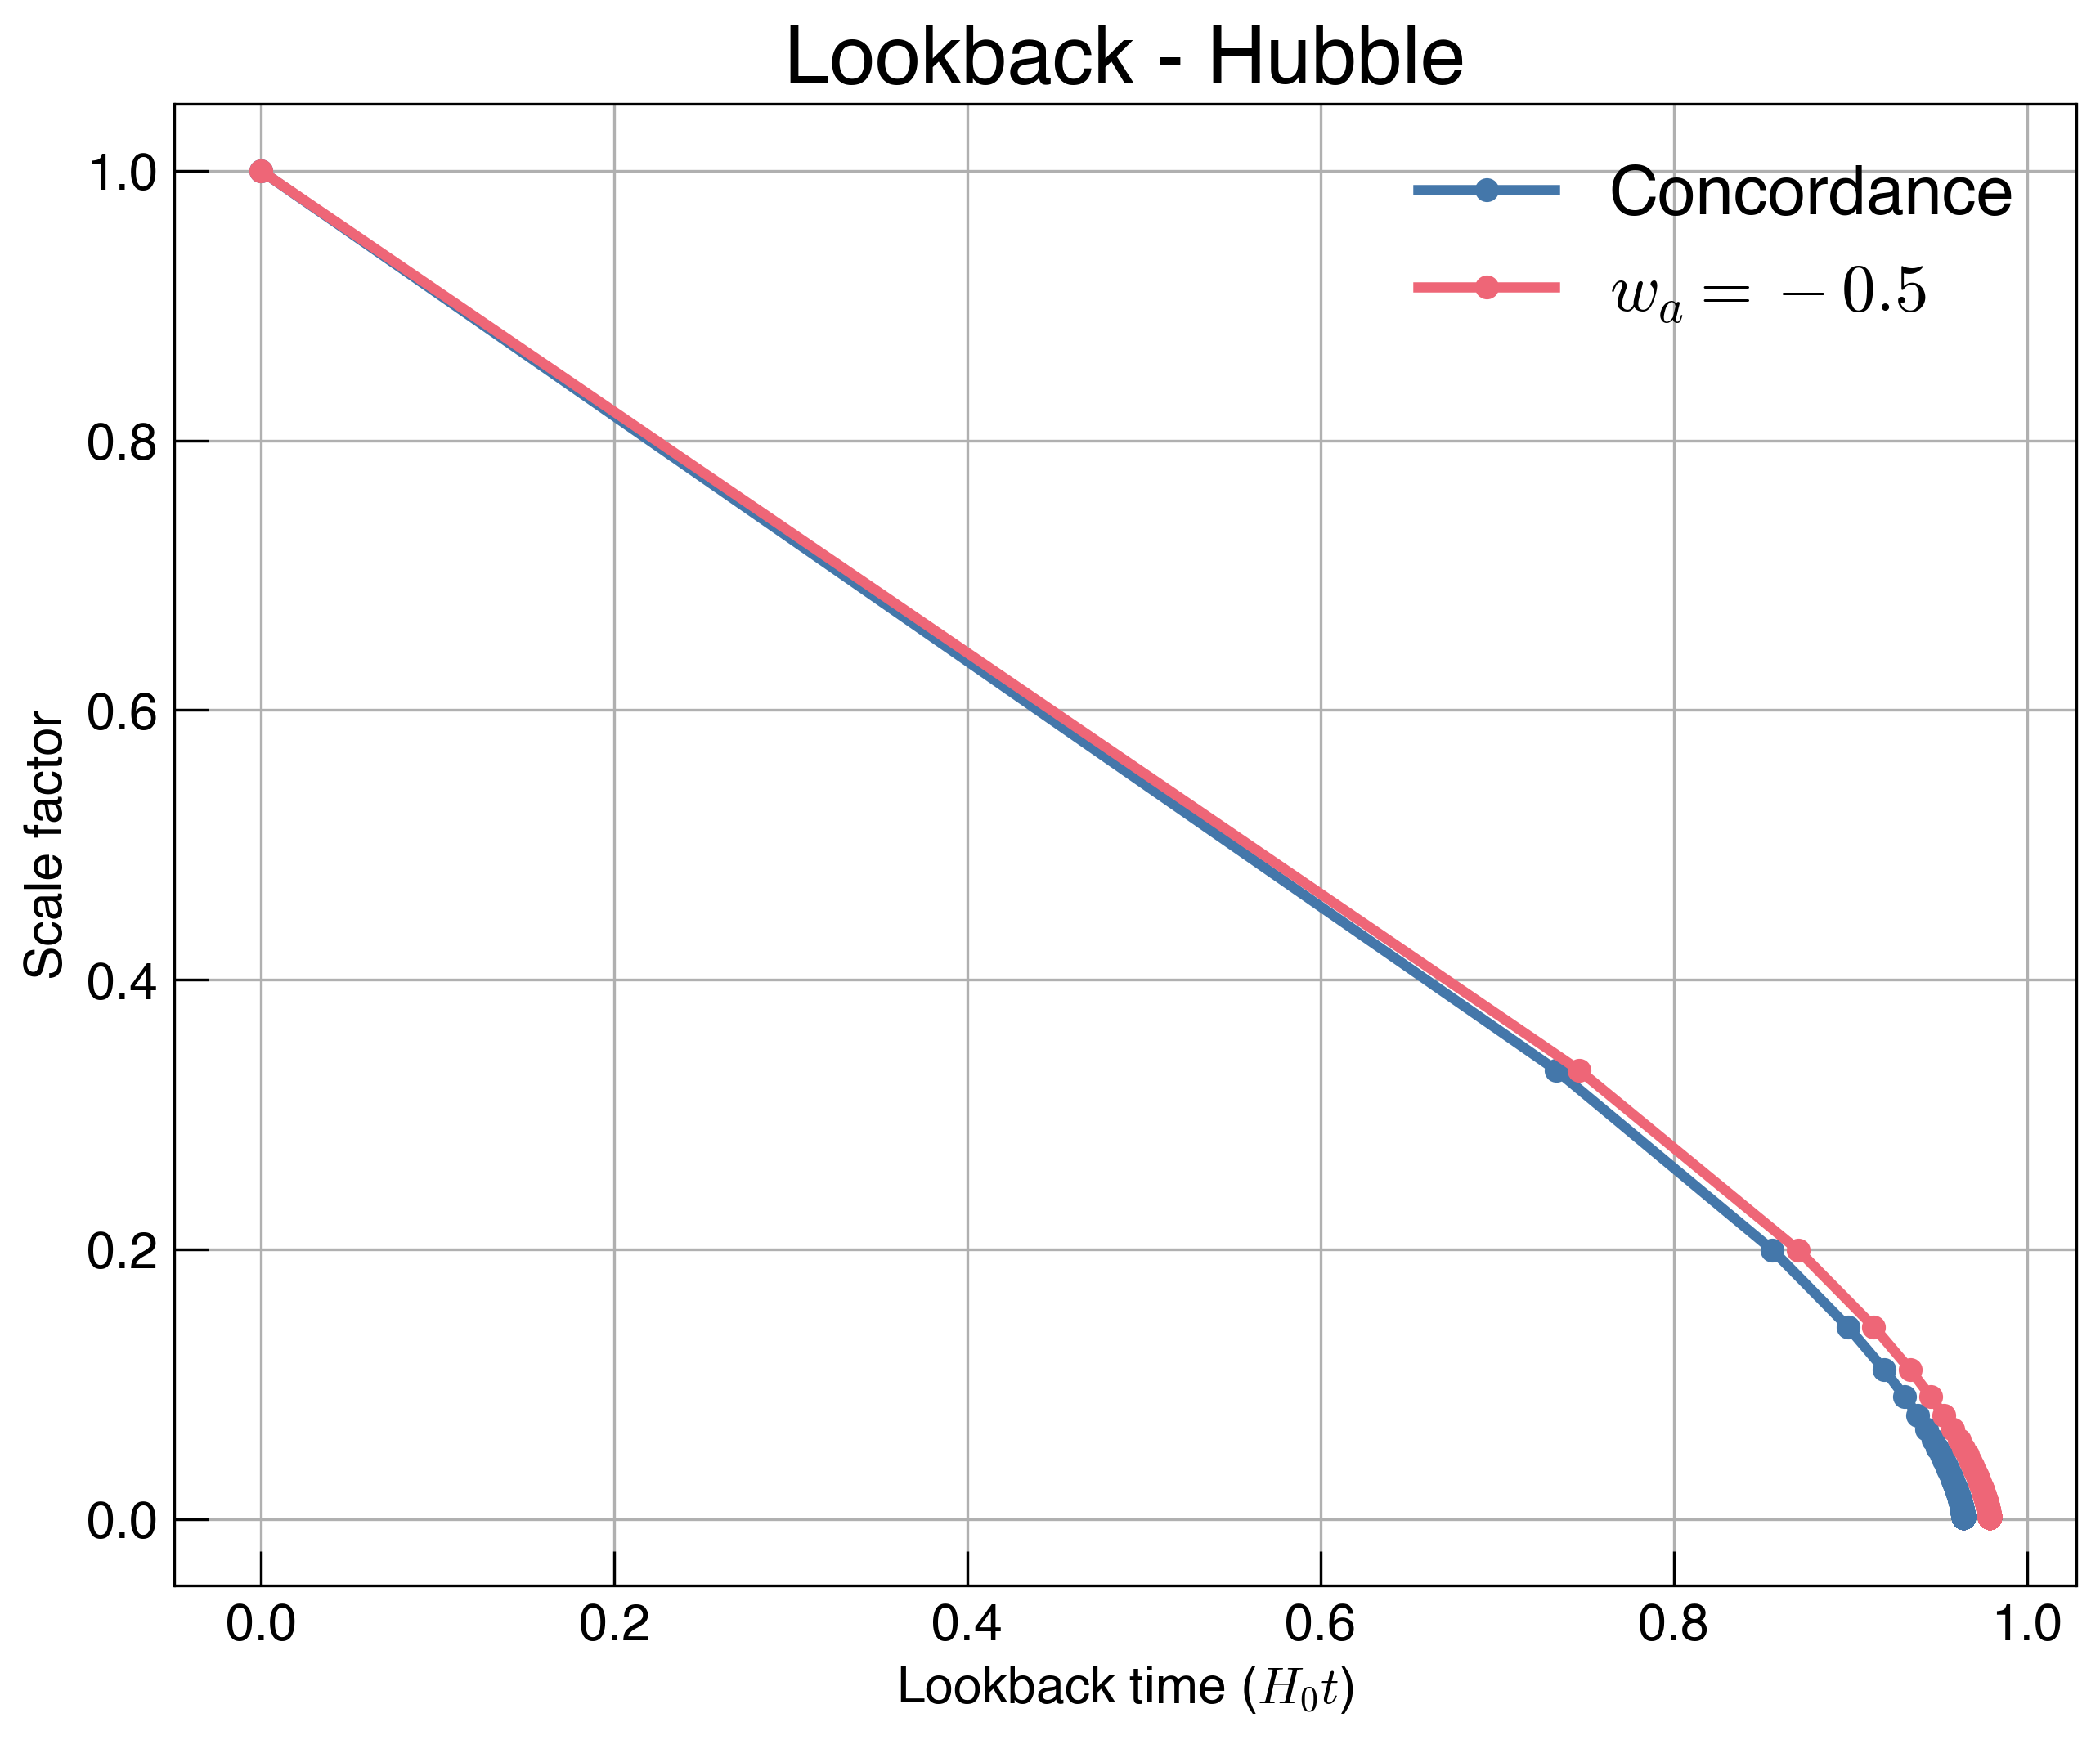

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(time_look_arr_concordance, a_arr, marker='o', label='Concordance')
ax.plot(time_look_arr_lambda, a_arr, marker='o', label=r'$w_a = -0.5$')

ax.set_xlabel(r"Lookback time ($H_0 t$)")
ax.set_ylabel("Scale factor")

ax.set_title("Lookback - Hubble")

ax.legend()

ax.grid()

In [22]:
header_info = "z (redshift), a (scale factor), Age (Gyrs), t_lookback (H0 * t)"

num_zs = z_arr.size

conc_arr = np.zeros((num_zs, 4))
conc_arr[:,0] = z_arr
conc_arr[:,1] = a_arr
conc_arr[:,2] = age_Gyr_concordance
conc_arr[:,3] = time_look_arr_concordance


wa_arr = np.zeros((num_zs, 4))
wa_arr[:,0] = z_arr
wa_arr[:,1] = a_arr
wa_arr[:,2] = age_Gyr_lambda
wa_arr[:,3] = time_look_arr_lambda

np.savetxt('timetable_concordance.txt', conc_arr, header=header_info, delimiter=', ')
np.savetxt('timetable_wa.txt', conc_arr, header=header_info, delimiter=', ')

In [24]:
conc_arr = np.loadtxt('timetable_concordance.txt', skiprows=1, delimiter = ',')
wa_arr = np.loadtxt('timetable_wa.txt', skiprows=1, delimiter = ',')

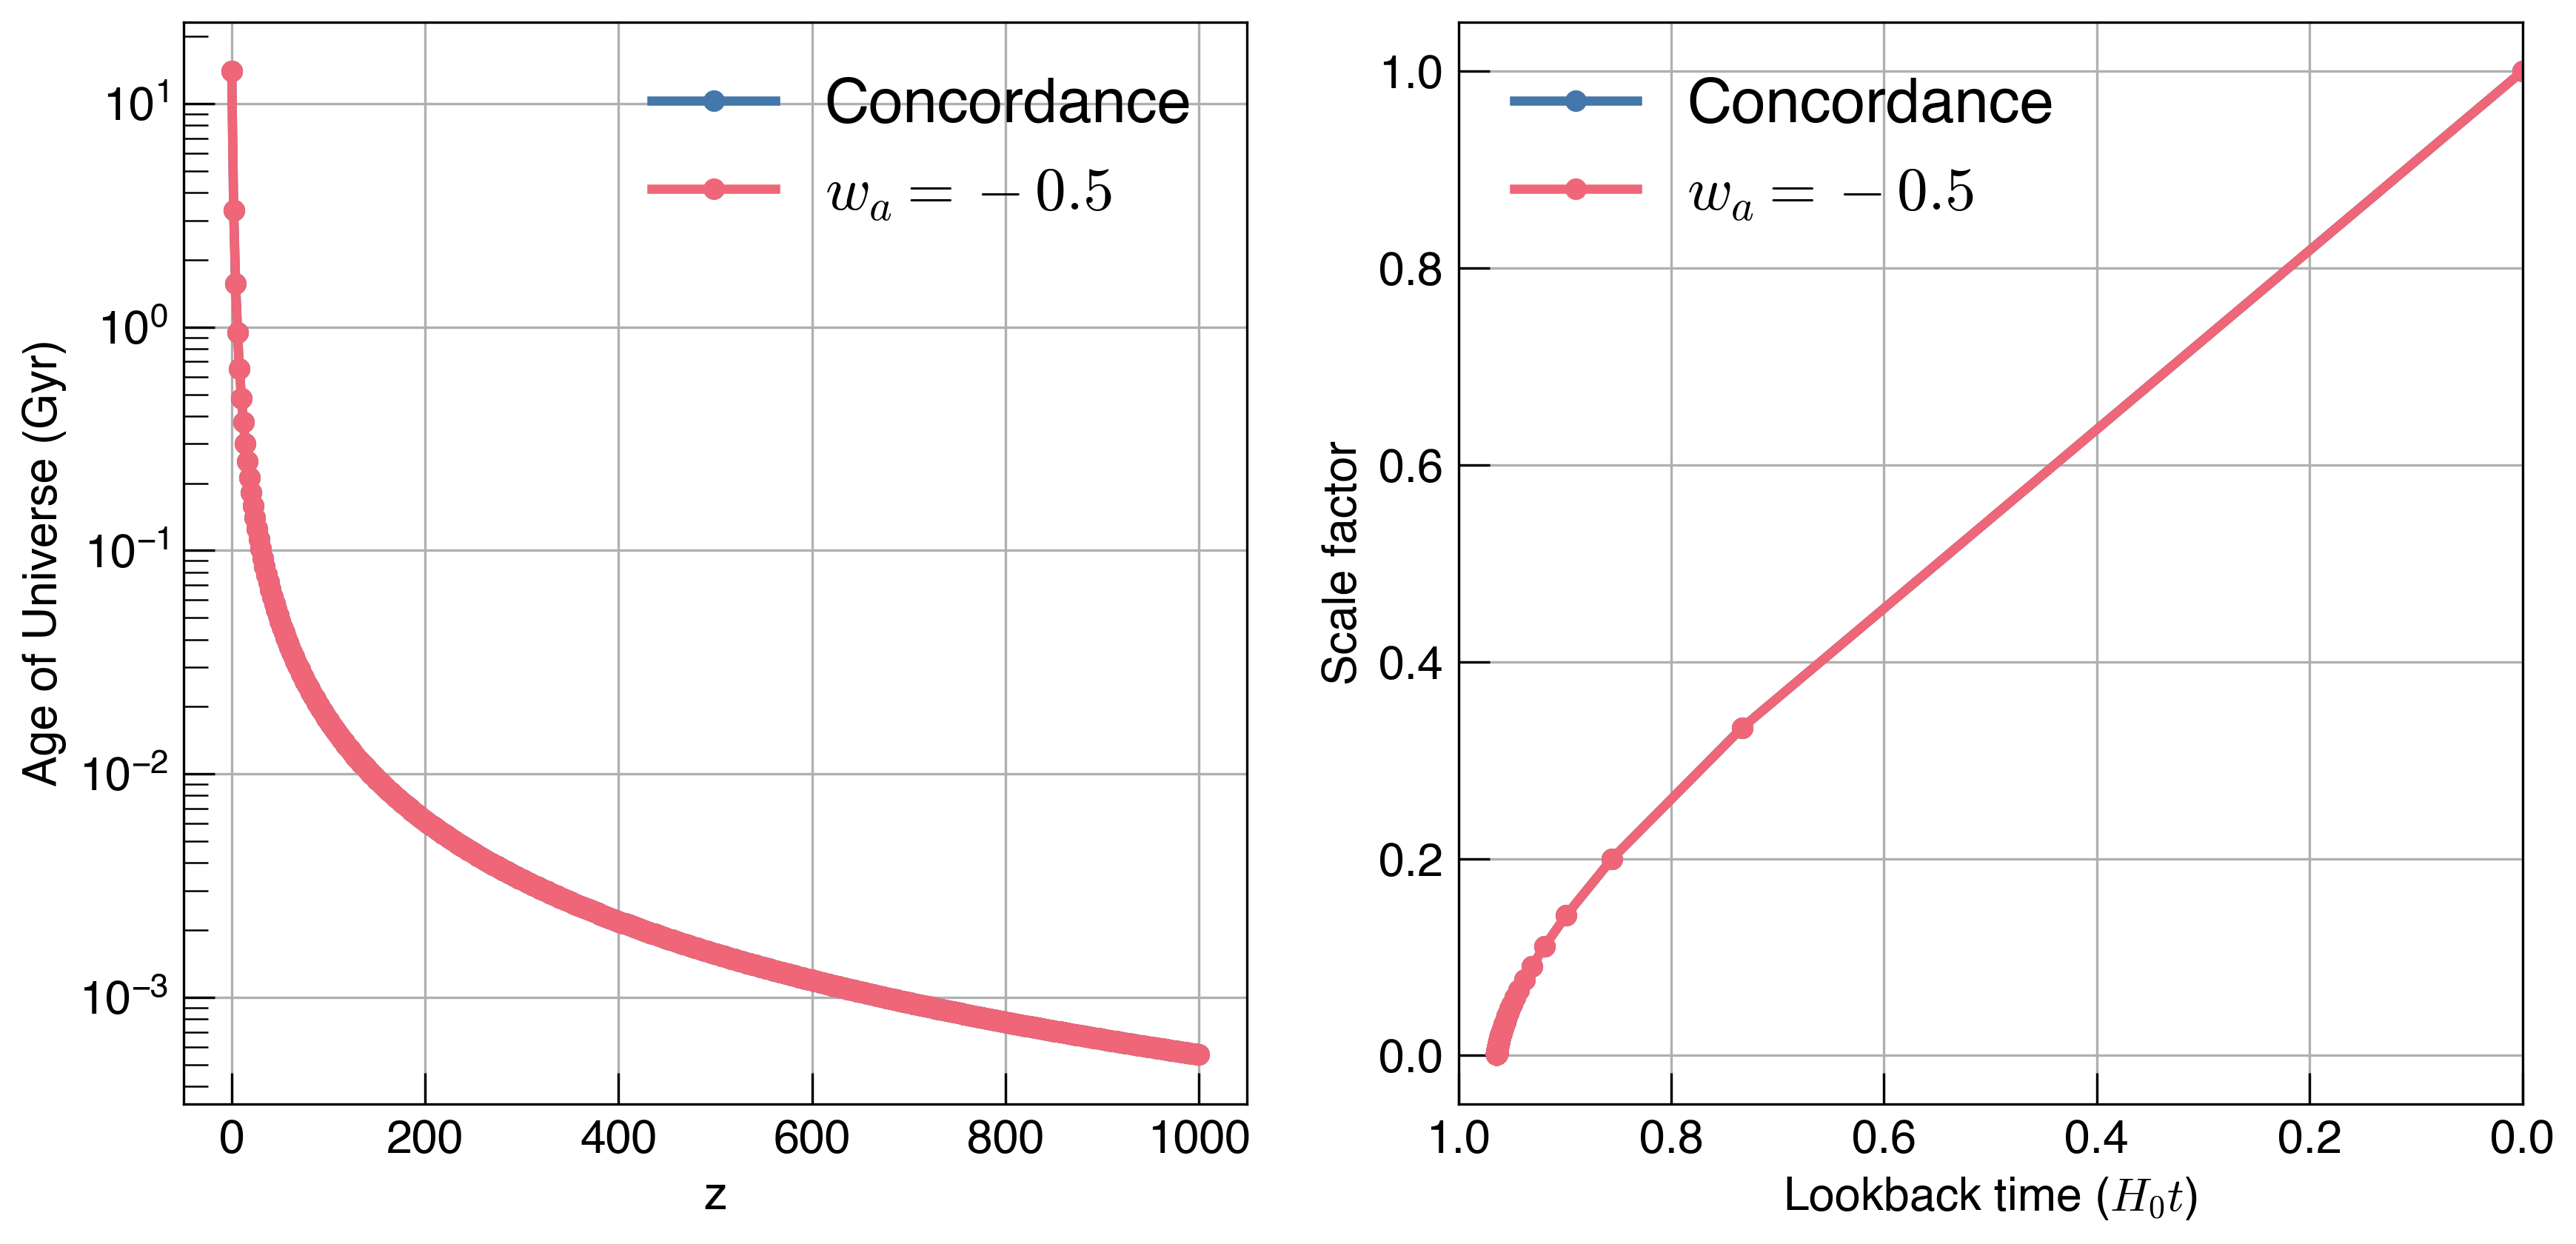

In [25]:
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=2)

ax[0].plot(conc_arr[:,0], conc_arr[:,2], marker='o', label='Concordance')
ax[0].plot(wa_arr[:,0], wa_arr[:,2], marker='o', label=r'$w_a = -0.5$')

ax[0].set_xlabel("z")
ax[0].set_yscale('log')
ax[0].set_ylabel("Age of Universe (Gyr)")

ax[0].legend()
ax[0].grid()

ax[1].plot(conc_arr[:,3], conc_arr[:,1], marker='o', label='Concordance')
ax[1].plot(wa_arr[:,3], wa_arr[:,1], marker='o', label=r'$w_a = -0.5$')

ax[1].set_xlabel(r"Lookback time ($H_0 t$)")
ax[1].set_ylabel("Scale factor")
ax[1].set_xlim(1.0,0.)

ax[1].legend()
ax[1].grid()

plt.tight_layout()